In [1]:
import os
import pandas as pd
from supabase import create_client
from dotenv import load_dotenv

# Load .env
load_dotenv()

SUPABASE_URL = os.getenv("SUPABASE_URL")
SUPABASE_KEY = os.getenv("SUPABASE_KEY")

# Connect to Supabase
supabase = create_client(SUPABASE_URL, SUPABASE_KEY)

# Fetch table into Python
response = supabase.table("valuations_2025_clean_v2").select("*").execute()



In [2]:
# Extract data
data = response.data
df = pd.DataFrame(data)

# Quick EDA
print(df.head())



                                         property_id   report_reference  \
0  LR NO 7996-98 STAGE STREET ROAD WEBUYE TOWNSHI...  SOO/DOO/5376/1/25   
1  doc39516020250128161012 TITLE NO NAIROBO-BLOCK...  SOO/DOO/5286/1/25   
2  PORTION NUMBER 1362 MALINDI CASUARINA AREA MAL...      SOO/5324/1/25   
3                            doc42268820251029132806  SOO/DOO/5383/1/25   
4  TITLE NO NJORO-NGATA BLOCK 2-5138 RVIST AREA O...   SOO/AM/5282/1/25   

                          client_name                             valuer_name  \
0                 Absa Bank Kenya PLC  Simon Oruka Orwa, Danish Onyango Orech   
1                    John P. N. Simba  Simon Oruka Orwa, Danish Onyango Orech   
2              KCB Bank Kenya Limited                        Simon Oruka Orwa   
3         Mission Aviation Fellowship  Simon Oruka Orwa, Danish Onyango Orech   
4  Co-operative Bank of Kenya Limited                        Simon Oruka Orwa   

  inspection_date valuation_date location_county  \
0      202

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   property_id            113 non-null    object 
 1   report_reference       113 non-null    object 
 2   client_name            113 non-null    object 
 3   valuer_name            113 non-null    object 
 4   inspection_date        113 non-null    object 
 5   valuation_date         113 non-null    object 
 6   location_county        113 non-null    object 
 7   location_description   113 non-null    object 
 8   location_coordinates   112 non-null    object 
 9   plot_area_hectares     113 non-null    float64
 10  plot_area_acres        113 non-null    float64
 11  land_use               113 non-null    object 
 12  plot_shape             111 non-null    object 
 13  soil_type              113 non-null    object 
 14  gradient               106 non-null    object 
 15  tenure

In [4]:
print(df.describe())


       plot_area_hectares  plot_area_acres  market_value_amount         id  \
count          113.000000       113.000000         1.130000e+02  113.00000   
mean             2.441746         6.108420         1.085947e+08   57.00000   
std              8.511049        21.173485         1.708102e+08   32.76431   
min              0.000000         0.000000         0.000000e+00    1.00000   
25%              0.039000         0.118600         1.600000e+07   29.00000   
50%              0.103100         0.333100         5.000000e+07   57.00000   
75%              0.381600         0.943000         1.100000e+08   85.00000   
max             50.900000       127.300000         1.175000e+09  113.00000   

       latitude_decimal  longitude_decimal  
count        112.000000         112.000000  
mean          -1.201501          36.909826  
std            1.219746           1.301477  
min           -4.307136          34.560944  
25%           -1.331417          36.634056  
50%           -1.285917    

In [5]:
df.shape

(113, 25)

In [6]:
df.isna().sum()

property_id              0
report_reference         0
client_name              0
valuer_name              0
inspection_date          0
valuation_date           0
location_county          0
location_description     0
location_coordinates     1
plot_area_hectares       0
plot_area_acres          0
land_use                 0
plot_shape               2
soil_type                0
gradient                 7
tenure_type              0
registered_proprietor    0
market_value_amount      0
metadata                 0
created_at               0
land_reg_number          0
encumbrance_category     0
id                       0
latitude_decimal         1
longitude_decimal        1
dtype: int64

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
import warnings
warnings.filterwarnings('ignore')

In [8]:
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")

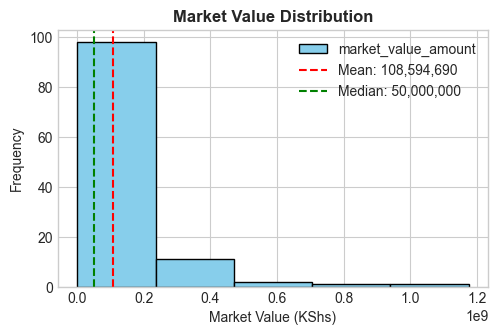

In [11]:
fig = plt.figure(figsize=(20, 12))
gs = GridSpec(3, 3, figure=fig, hspace=0.3, wspace=0.3)

# 1.1 Market Value Distribution
ax1 = fig.add_subplot(gs[0, 0])
df['market_value_amount'].plot(kind='hist', bins=5, ax=ax1, color='skyblue', edgecolor='black')
ax1.set_xlabel('Market Value (KShs)', fontsize=10)
ax1.set_ylabel('Frequency', fontsize=10)
ax1.set_title('Market Value Distribution', fontsize=12, fontweight='bold')
ax1.axvline(df['market_value_amount'].mean(), color='red', linestyle='--', label=f'Mean: {df["market_value_amount"].mean():,.0f}')
ax1.axvline(df['market_value_amount'].median(), color='green', linestyle='--', label=f'Median: {df["market_value_amount"].median():,.0f}')
ax1.legend()

KeyError: 'client_type'

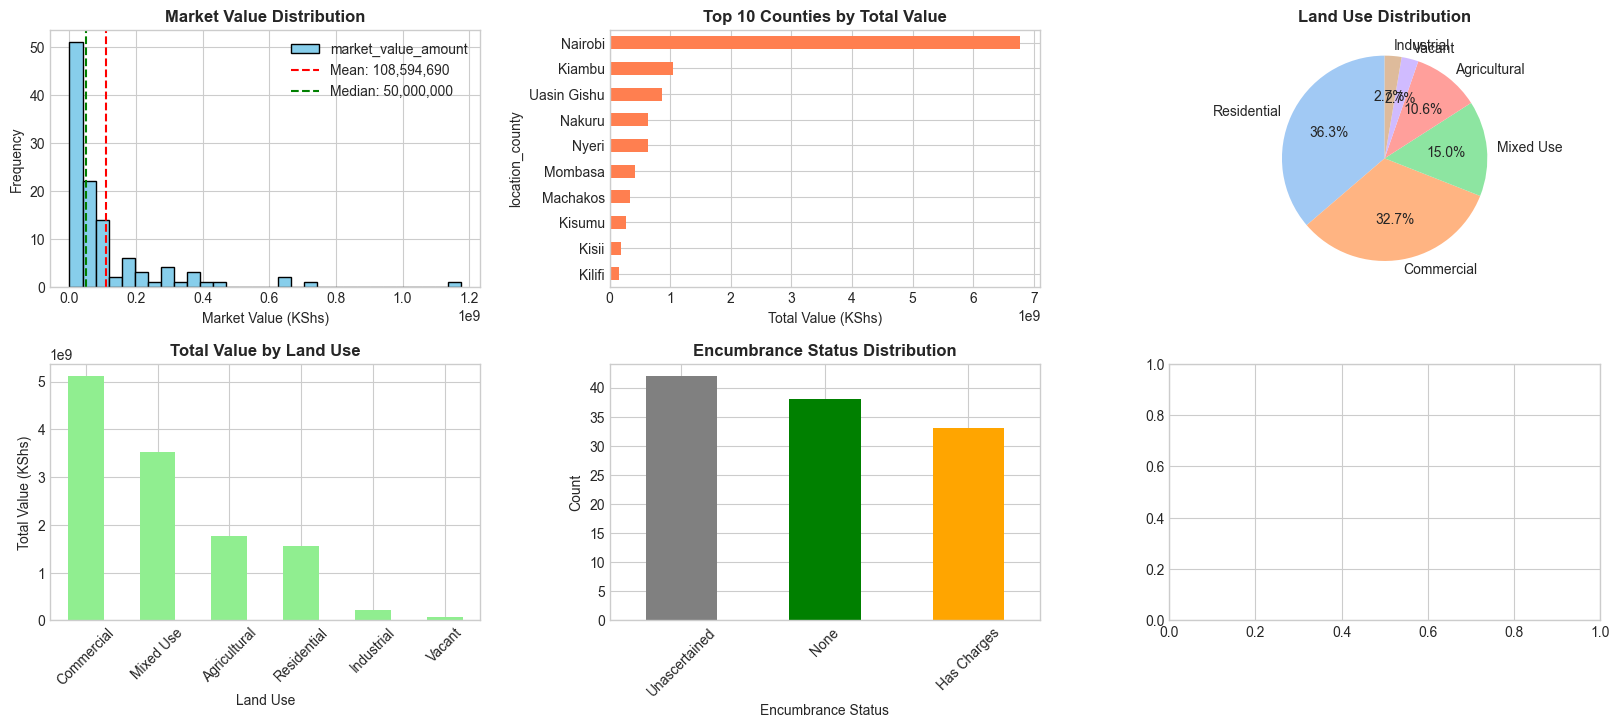

In [16]:
fig = plt.figure(figsize=(20, 12))
gs = GridSpec(3, 3, figure=fig, hspace=0.3, wspace=0.3)

# 1.1 Market Value Distribution
ax1 = fig.add_subplot(gs[0, 0])
df['market_value_amount'].plot(kind='hist', bins=30, ax=ax1, color='skyblue', edgecolor='black')
ax1.set_xlabel('Market Value (KShs)', fontsize=10)
ax1.set_ylabel('Frequency', fontsize=10)
ax1.set_title('Market Value Distribution', fontsize=12, fontweight='bold')
ax1.axvline(df['market_value_amount'].mean(), color='red', linestyle='--', label=f'Mean: {df["market_value_amount"].mean():,.0f}')
ax1.axvline(df['market_value_amount'].median(), color='green', linestyle='--', label=f'Median: {df["market_value_amount"].median():,.0f}')
ax1.legend()

# 1.2 Top 10 Counties by Value
ax2 = fig.add_subplot(gs[0, 1])
county_value = df.groupby('location_county')['market_value_amount'].sum().sort_values(ascending=False).head(10)
county_value.plot(kind='barh', ax=ax2, color='coral')
ax2.set_xlabel('Total Value (KShs)', fontsize=10)
ax2.set_title('Top 10 Counties by Total Value', fontsize=12, fontweight='bold')
ax2.invert_yaxis()

# 1.3 Land Use Distribution
ax3 = fig.add_subplot(gs[0, 2])
land_use_counts = df['land_use'].value_counts()
colors = sns.color_palette('pastel')[0:len(land_use_counts)]
ax3.pie(land_use_counts, labels=land_use_counts.index, autopct='%1.1f%%', colors=colors, startangle=90)
ax3.set_title('Land Use Distribution', fontsize=12, fontweight='bold')

# 1.4 Value by Land Use
ax4 = fig.add_subplot(gs[1, 0])
land_use_value = df.groupby('land_use')['market_value_amount'].sum().sort_values(ascending=False)
land_use_value.plot(kind='bar', ax=ax4, color='lightgreen')
ax4.set_xlabel('Land Use', fontsize=10)
ax4.set_ylabel('Total Value (KShs)', fontsize=10)
ax4.set_title('Total Value by Land Use', fontsize=12, fontweight='bold')
ax4.tick_params(axis='x', rotation=45)

# 1.5 Encumbrance Status
ax5 = fig.add_subplot(gs[1, 1])
encumbrance_counts = df['encumbrance_category'].value_counts()
colors_enc = {'None': 'green', 'Has Charges': 'orange', 'Unascertained': 'gray'}
bar_colors = [colors_enc.get(x, 'blue') for x in encumbrance_counts.index]
encumbrance_counts.plot(kind='bar', ax=ax5, color=bar_colors)
ax5.set_xlabel('Encumbrance Status', fontsize=10)
ax5.set_ylabel('Count', fontsize=10)
ax5.set_title('Encumbrance Status Distribution', fontsize=12, fontweight='bold')
ax5.tick_params(axis='x', rotation=45)

# 1.6 Client Type Analysis
ax6 = fig.add_subplot(gs[1, 2])
client_type_value = df.groupby('client_type')['market_value_amount'].sum().sort_values(ascending=False)
client_type_value.plot(kind='bar', ax=ax6, color='steelblue')
ax6.set_xlabel('Client Type', fontsize=10)
ax6.set_ylabel('Total Value (KShs)', fontsize=10)
ax6.set_title('Total Value by Client Type', fontsize=12, fontweight='bold')
ax6.tick_params(axis='x', rotation=45)

# 1.7 Value Category Distribution
ax7 = fig.add_subplot(gs[2, 0])
value_cat_counts = df['value_category'].value_counts().sort_index()
value_cat_counts.plot(kind='bar', ax=ax7, color='mediumpurple')
ax7.set_xlabel('Value Category', fontsize=10)
ax7.set_ylabel('Count', fontsize=10)
ax7.set_title('Property Value Categories', fontsize=12, fontweight='bold')
ax7.tick_params(axis='x', rotation=45)

# 1.8 Land Size Distribution
ax8 = fig.add_subplot(gs[2, 1])
df['plot_area_acres'].plot(kind='box', ax=ax8, vert=True, patch_artist=True, 
                            boxprops=dict(facecolor='lightblue'))
ax8.set_ylabel('Acres', fontsize=10)
ax8.set_title('Land Size Distribution (Box Plot)', fontsize=12, fontweight='bold')

# 1.9 Tenure Type
ax9 = fig.add_subplot(gs[2, 2])
tenure_counts = df['tenure_type'].value_counts()
ax9.pie(tenure_counts, labels=tenure_counts.index, autopct='%1.1f%%', 
        colors=sns.color_palette('Set3'), startangle=90)
ax9.set_title('Tenure Type Distribution', fontsize=12, fontweight='bold')

plt.suptitle('PROPERTY VALUATIONS 2025 - EXECUTIVE DASHBOARD', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig('executive_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()